In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data=pd.read_excel("output.xlsx")

In [20]:
data.head()

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-11,1.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Non recurring,NaN,NaN
1,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-16,1000.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Recurring,yes,1 string is recurring considering +/-5 days
2,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-17,800.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Recurring,NaN,NaN
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-11-13,30.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Recurring,NaN,NaN
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-03-30,10000.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Recurring,NaN,NaN


In [21]:
print(len(data["category"].value_counts()))
data["category"].value_counts()

20


PEER TO PEER TRANSFER          2598
OTHER INCOME                    917
UNCATEGORIZED                   128
UTILITIES AND BILLS             121
CASH WITHDRAWALS                 83
LOANS                            58
FEES AND CHARGES                 30
FOOD AND BEVERAGES               22
INCOME                           20
LOAN DISBURSALS                  19
TRANSPORT                         8
ENTERTAINMENT                     7
WALLETS AND PAYMENT GATEWAY       5
MISC                              4
SUBSCRIPTIONS                     4
EDUCATION                         3
SAVINGS AND INVESTMENTS           2
MEDICAL                           2
TRAVEL                            1
SHOPPING                          1
Name: category, dtype: int64

In [22]:
data=data.sort_values(by='valueDate',ascending=True)

In [23]:
data.reset_index(inplace=True,drop=True)

In [24]:
data

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments
0,XYZ,4337e7f26e44e09d628308dd9870c9ad,UPI/114466228607/Payment from Ph/kreditbee@ind...,2021-05-24,3979.0,DEBIT,LOANS,EMI,KREDITBEE,Non recurring,NaN,NaN
1,ABC,5fd6c8ba-077e-4f3b-80dd-aea17d51cb11,POS 652166XXXXXX4757 SAROJ,2021-05-29,205.0,DEBIT,UNCATEGORIZED,-,NaN,Recurring,no,NaN
2,ABC,5fd6c8ba-077e-4f3b-80dd-aea17d51cb11,UPI,2021-05-29,5000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Non recurring,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4028,XYZ,4b286bec51c2cce84ccc61fb6af87bac,UPI-VINEY GOYAL-ADDFI.55550119040291@FBL-FDRL0...,2022-07-29,235.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Non recurring,NaN,NaN
4029,XYZ,4b286bec51c2cce84ccc61fb6af87bac,.IMPS P2P 216517304485#14/06/2022 140622-CDT22...,2022-07-30,5.9,DEBIT,PEER TO PEER TRANSFER,BANK TRANSFER,NaN,Non recurring,NaN,NaN
4030,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221215343700/W/GADGET ZON/HDFC Bank,2022-08-01,100000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,GADGET ZONE,Non recurring,NaN,NaN
4031,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221203478831/30020160 by USE/PRAKASH /S,2022-08-01,1500.0,DEBIT,PEER TO PEER TRANSFER,BANK TRANSFER,NaN,Non recurring,NaN,NaN


In [25]:
def fun_dataprep(df):
    df['year'] = pd.to_datetime(df['valueDate']).dt.year
    df['month'] = pd.to_datetime(df['valueDate']).dt.month
    df['day'] = pd.to_datetime(df['valueDate']).dt.day
    df['week_day'] = pd.to_datetime(df['valueDate']).dt.weekday
    return df

In [26]:
data=fun_dataprep(data)
data

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day
0,XYZ,4337e7f26e44e09d628308dd9870c9ad,UPI/114466228607/Payment from Ph/kreditbee@ind...,2021-05-24,3979.0,DEBIT,LOANS,EMI,KREDITBEE,Non recurring,NaN,NaN,2021,5,24,0
1,ABC,5fd6c8ba-077e-4f3b-80dd-aea17d51cb11,POS 652166XXXXXX4757 SAROJ,2021-05-29,205.0,DEBIT,UNCATEGORIZED,-,NaN,Recurring,no,NaN,2021,5,29,5
2,ABC,5fd6c8ba-077e-4f3b-80dd-aea17d51cb11,UPI,2021-05-29,5000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,5,29,5
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Non recurring,NaN,NaN,2021,5,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,XYZ,4b286bec51c2cce84ccc61fb6af87bac,UPI-VINEY GOYAL-ADDFI.55550119040291@FBL-FDRL0...,2022-07-29,235.0,DEBIT,PEER TO PEER TRANSFER,UPI,NaN,Non recurring,NaN,NaN,2022,7,29,4
4029,XYZ,4b286bec51c2cce84ccc61fb6af87bac,.IMPS P2P 216517304485#14/06/2022 140622-CDT22...,2022-07-30,5.9,DEBIT,PEER TO PEER TRANSFER,BANK TRANSFER,NaN,Non recurring,NaN,NaN,2022,7,30,5
4030,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221215343700/W/GADGET ZON/HDFC Bank,2022-08-01,100000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,GADGET ZONE,Non recurring,NaN,NaN,2022,8,1,0
4031,XYZ,d4d2161a27958cfbc918ece483d1344c,MMT/IMPS/221203478831/30020160 by USE/PRAKASH /S,2022-08-01,1500.0,DEBIT,PEER TO PEER TRANSFER,BANK TRANSFER,NaN,Non recurring,NaN,NaN,2022,8,1,0


In [27]:
user_wise_data=[]
for i in data["USER id"].value_counts().index:
    user_wise_data.append(data[data["USER id"]==i])

In [28]:
dt_credit=[]
dt_debit=[]

for i in user_wise_data:
    dt_credit.append(i[i["type"]=="CREDIT"])
    dt_debit.append(i[i["type"]=="DEBIT"])

In [29]:
d_credit_category=[]
d_debit_category=[]

In [30]:
for i in dt_credit:
    res={}
    for j in i["category"].value_counts().index:
        res[j]=i[i["category"]==j]
    d_credit_category.append(res)

In [31]:
for i in dt_debit:
    res={}
    for j in i["category"].value_counts().index:
        res[j]=i[i["category"]==j]
    d_debit_category.append(res)

In [32]:
for i in range(len(d_credit_category)):  # dictionary
    for j in d_credit_category[i].keys():
        v=d_credit_category[i][j]
        res={}
        for r in v["subcategory"].value_counts().index:
            res[r]=v[v["subcategory"]==r]
        d_credit_category[i][j]=res   
        

In [33]:
for i in range(len(d_debit_category)):  # dictionary
    for j in d_debit_category[i].keys():
        v=d_debit_category[i][j]
        res={}
        for r in v["subcategory"].value_counts().index:
            res[r]=v[v["subcategory"]==r]
        d_debit_category[i][j]=res   

# Model 2.0

# 

In [34]:
d_credit=[]
for i in d_credit_category:
    for j in i.keys():
        for k in i[j].keys():
            d_credit.append((j,k))
            
            
d_credit=set(d_credit)
d_credit

{('INCOME', 'SALARY'),
 ('LOAN DISBURSALS', 'LOAN ACCOUNT VERIFICATION'),
 ('LOAN DISBURSALS', 'LOAN DISBURSALS'),
 ('OTHER INCOME', 'CASH DEPOSITS'),
 ('OTHER INCOME', 'EPFO'),
 ('OTHER INCOME', 'INSURANCE INDEMNITY'),
 ('OTHER INCOME', 'INTEREST CAPITALIZATION'),
 ('OTHER INCOME', 'INVESTMENT INCOME'),
 ('OTHER INCOME', 'OTHER DEPOSITS'),
 ('OTHER INCOME', 'REFUNDS AND REVERSALS'),
 ('UNCATEGORIZED', '-')}

In [35]:
d_debit=[]
for i in d_debit_category:
    for j in i.keys():
        for k in i[j].keys():
            d_debit.append((j,k))
            
            
d_debit=set(d_debit)
d_debit

{('CASH WITHDRAWALS', 'CASH WITHDRAWALS'),
 ('EDUCATION', 'OTHERS'),
 ('ENTERTAINMENT', 'BARS AND PUBS'),
 ('ENTERTAINMENT', 'GAMBLING'),
 ('FEES AND CHARGES', 'BOUNCE CHARGES'),
 ('FEES AND CHARGES', 'DEBIT AND CREDIT CARD FEES'),
 ('FEES AND CHARGES', 'OTHERS'),
 ('FOOD AND BEVERAGES', 'DINING OUT'),
 ('FOOD AND BEVERAGES', 'ONLINE DELIVERY'),
 ('LOANS', 'EMI'),
 ('MEDICAL', 'HOSPITAL EXPENSES'),
 ('MISC', 'FOREX'),
 ('PEER TO PEER TRANSFER', 'BANK TRANSFER'),
 ('PEER TO PEER TRANSFER', 'UPI'),
 ('SAVINGS AND INVESTMENTS', 'RECURRING DEPOSIT'),
 ('SHOPPING', 'FASHION'),
 ('SUBSCRIPTIONS', 'MEDIA SUBSCRIPTIONS'),
 ('TRANSPORT', 'AUTOMOBILE PURCHASE'),
 ('TRANSPORT', 'FUEL'),
 ('TRANSPORT', 'TRAINS'),
 ('TRAVEL', 'HOTEL'),
 ('UNCATEGORIZED', '-'),
 ('UTILITIES AND BILLS', 'CREDIT CARD PAYMENT'),
 ('UTILITIES AND BILLS', 'MOBILE AND INTERNET'),
 ('WALLETS AND PAYMENT GATEWAY', 'WALLETS AND PAYMENT GATEWAY')}

In [36]:
test=d_credit_category[0]

In [37]:
def res(df):
    df.reset_index(inplace=True,drop=True)
    df=df.sort_values(by='valueDate',ascending=True)
    amount_col="amount"
    amount_tolerance=0.2
    df['freq'] = df[amount_col].map(lambda x: (df[(df[amount_col] >= x - x * amount_tolerance) & 
                            (df[amount_col] <= x + x * amount_tolerance)] ))
    
    df=df["freq"].values[0]
    
    
    date=list(df.valueDate)
    date.pop(0)
    date.append(date[-1])
    plt.figure(figsize=(20,10)) 
    sns.scatterplot(data=df,x="valueDate",y="amount")
    df["New_date"]=date
    df["No.of days"]=(df["New_date"] - df["valueDate"]).dt.days
    plt.figure(figsize=(20,10)) 
    sns.scatterplot(data=df,x="amount",y="No.of days")
    
    return df
    
    

## Single Case Explanation

In [38]:
test2=test["OTHER INCOME"]["OTHER DEPOSITS"]
test2

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0
73,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-10,20000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,10,3
83,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-11,1000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,11,4
93,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-14,300.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,14,0
105,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-16,4000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-23,2000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,23,0
3932,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-26,3000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,different merchant strings are evaluated as se...,2022,5,26,3
3946,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-27,1500.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,27,4
3953,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,IMPS-214821843764-MANJUNATH V-AIRP-XXXXXX8332-...,2022-05-28,2000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,28,5


In [39]:
test2.reset_index(inplace=True,drop=True)

In [40]:
test2

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0
1,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-10,20000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,10,3
2,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-11,1000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,11,4
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-14,300.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,14,0
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-16,4000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-23,2000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,23,0
422,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-26,3000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,different merchant strings are evaluated as se...,2022,5,26,3
423,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-27,1500.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,27,4
424,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,IMPS-214821843764-MANJUNATH V-AIRP-XXXXXX8332-...,2022-05-28,2000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,28,5


In [41]:
import seaborn as sns

<AxesSubplot:xlabel='valueDate', ylabel='amount'>

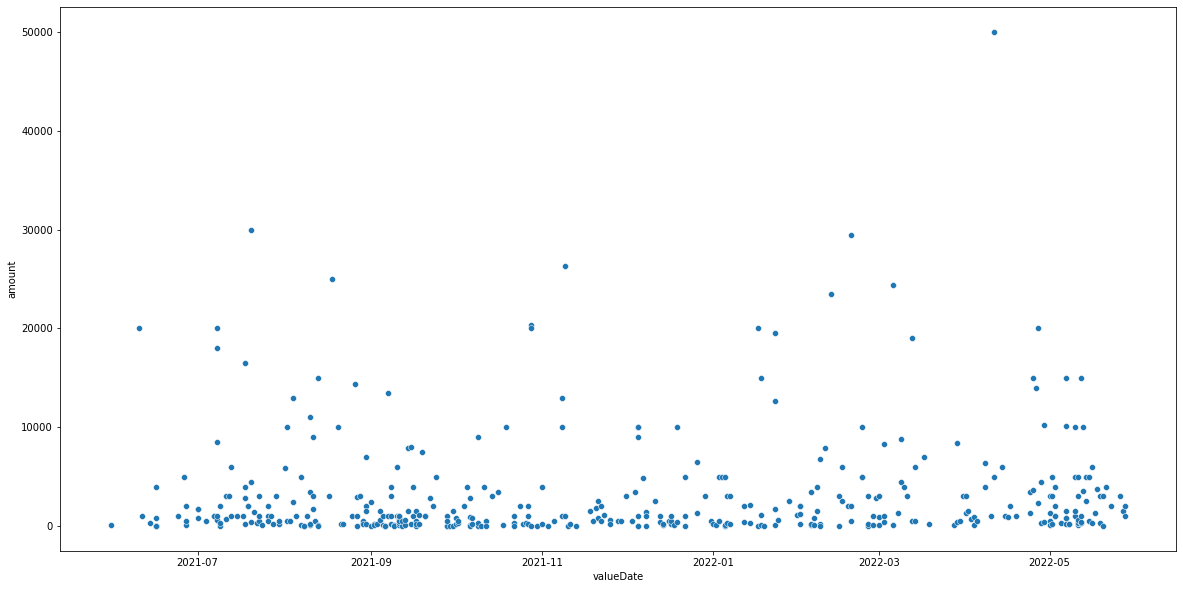

In [42]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=test2,x="valueDate",y="amount")

In [43]:
test2=test2.sort_values(by='valueDate',ascending=True)
test2

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0
1,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-10,20000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,10,3
2,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-11,1000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,11,4
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-14,300.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,14,0
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-16,4000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-23,2000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,23,0
422,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-26,3000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,different merchant strings are evaluated as se...,2022,5,26,3
423,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-27,1500.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,27,4
424,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,IMPS-214821843764-MANJUNATH V-AIRP-XXXXXX8332-...,2022-05-28,2000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,28,5


In [44]:
amount_col="amount"
amount_tolerance=0.2
test2['freq'] = test2[amount_col].map(lambda x: (test2[(test2[amount_col] >= x - x * amount_tolerance) & 
                        (test2[amount_col] <= x + x * amount_tolerance)] ))

In [45]:
test2

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day,freq
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0,source USER...
1,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-10,20000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,10,3,source USER...
2,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-11,1000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,11,4,source USER...
3,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-14,300.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,14,0,source USER...
4,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-06-16,4000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,6,16,2,source USER...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-23,2000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,23,0,source USER...
422,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-26,3000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,different merchant strings are evaluated as se...,2022,5,26,3,source USER...
423,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2022-05-27,1500.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,27,4,source USER...
424,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,IMPS-214821843764-MANJUNATH V-AIRP-XXXXXX8332-...,2022-05-28,2000.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2022,5,28,5,source USER...


In [46]:
test2=test2["freq"].values[0]
test2

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0
52,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-07-24,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,7,24,5
69,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-07,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,7,5
75,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-10,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,10,1
81,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-13,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,13,4
105,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-02,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,2,3
135,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-13,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,13,0
143,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-17,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,17,4
173,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-10-06,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,10,6,2
186,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-10-18,114.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,10,18,0


In [47]:
date=list(test2.valueDate)
print(len(date))
date.pop(0)
date.append(date[-1])
len(date)
date

19


[Timestamp('2021-07-24 00:00:00'),
 Timestamp('2021-08-07 00:00:00'),
 Timestamp('2021-08-10 00:00:00'),
 Timestamp('2021-08-13 00:00:00'),
 Timestamp('2021-09-02 00:00:00'),
 Timestamp('2021-09-13 00:00:00'),
 Timestamp('2021-09-17 00:00:00'),
 Timestamp('2021-10-06 00:00:00'),
 Timestamp('2021-10-18 00:00:00'),
 Timestamp('2021-12-18 00:00:00'),
 Timestamp('2022-01-02 00:00:00'),
 Timestamp('2022-01-18 00:00:00'),
 Timestamp('2022-01-23 00:00:00'),
 Timestamp('2022-02-05 00:00:00'),
 Timestamp('2022-02-06 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-04 00:00:00')]

In [48]:
test2["New_date"]=date

C:\Users\91958\AppData\Local\Temp\ipykernel_3496\2815708134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2["New_date"]=date


In [49]:
test2

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day,New_date
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0,2021-07-24
52,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-07-24,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,7,24,5,2021-08-07
69,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-07,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,7,5,2021-08-10
75,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-10,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,10,1,2021-08-13
81,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-13,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,13,4,2021-09-02
105,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-02,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,2,3,2021-09-13
135,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-13,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,13,0,2021-09-17
143,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-17,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,17,4,2021-10-06
173,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-10-06,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,10,6,2,2021-10-18
186,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-10-18,114.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,10,18,0,2021-12-18


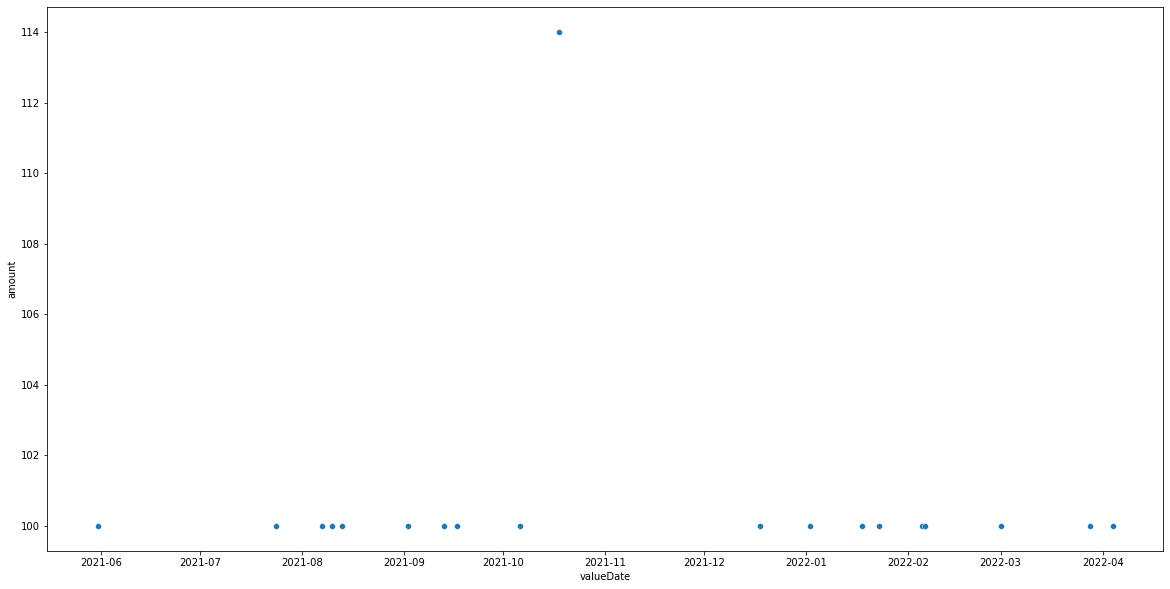

In [50]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=test2,x="valueDate",y="amount")
plt.show()

In [51]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [52]:
test2.head(2)

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day,New_date
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0,2021-07-24
52,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-07-24,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,7,24,5,2021-08-07


In [53]:
test2["No.of days"]=(test2["New_date"] - test2["valueDate"]).dt.days

<AxesSubplot:xlabel='No.of days', ylabel='amount'>

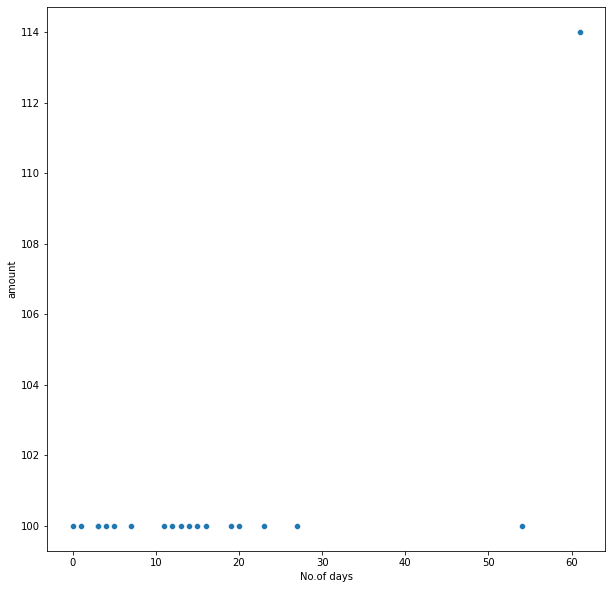

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=test2,y="amount",x="No.of days")

In [55]:
test2.head(10)

,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day,New_date,No.of days
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0,2021-07-24,54
52,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-07-24,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,7,24,5,2021-08-07,14
69,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-07,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,7,5,2021-08-10,3
75,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-10,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,10,1,2021-08-13,3
81,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-13,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,13,4,2021-09-02,20
105,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-02,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,2,3,2021-09-13,11
135,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-13,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,13,0,2021-09-17,4
143,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-17,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,17,4,2021-10-06,19
173,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-10-06,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,10,6,2,2021-10-18,12
186,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-10-18,114.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,10,18,0,2021-12-18,61


,source,USER id,narration,valueDate,amount,type,category,subcategory,merchant name,recurring,accuracy,comments,year,month,day,week_day,New_date,No.of days
0,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-05-31,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Non recurring,NaN,NaN,2021,5,31,0,2021-07-24,54
52,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-07-24,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,7,24,5,2021-08-07,14
69,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-07,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,7,5,2021-08-10,3
75,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-10,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,10,1,2021-08-13,3
81,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-08-13,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,8,13,4,2021-09-02,20
105,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-02,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,2,3,2021-09-13,11
135,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-13,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,13,0,2021-09-17,4
143,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-09-17,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,9,17,4,2021-10-06,19
173,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-10-06,100.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,10,6,2,2021-10-18,12
186,ABC,5d742f0e-30e0-437f-8aa9-49cdef0beff5,UPI,2021-10-18,114.0,CREDIT,OTHER INCOME,OTHER DEPOSITS,NaN,Recurring,yes,NaN,2021,10,18,0,2021-12-18,61


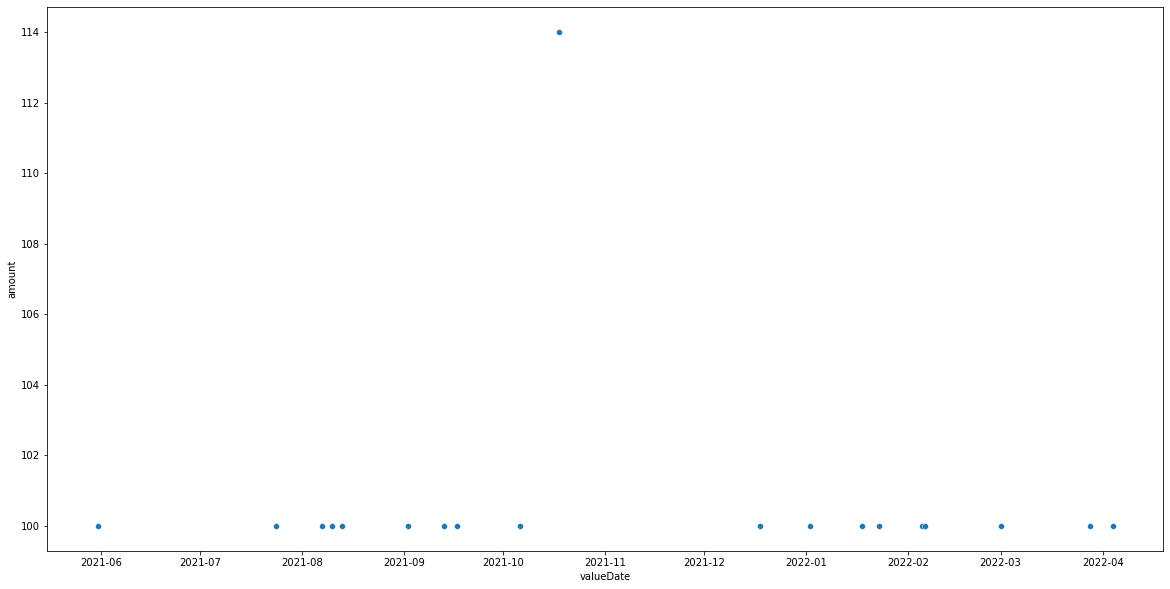

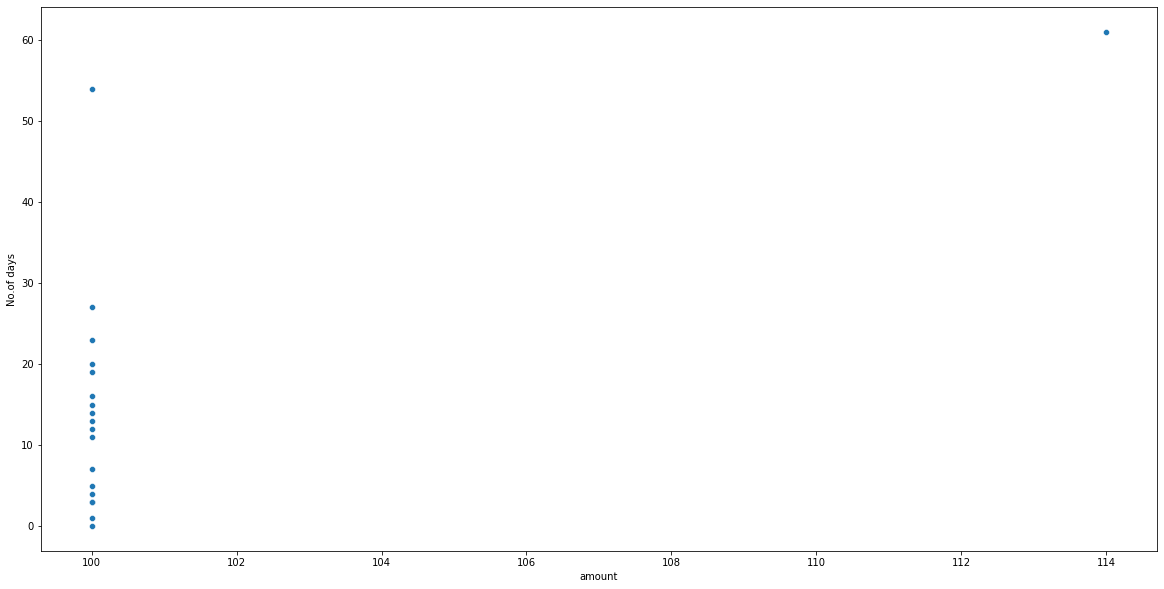

In [56]:
res(test["OTHER INCOME"]["OTHER DEPOSITS"])